Epoch 1/5 - Loss moyenne : 0.5456
Epoch 2/5 - Loss moyenne : 0.3232
Epoch 3/5 - Loss moyenne : 0.2954
Epoch 4/5 - Loss moyenne : 0.2823
Epoch 5/5 - Loss moyenne : 0.2734

Accuracy sous attaque FGSM (ε = 0.25) : 0.00%


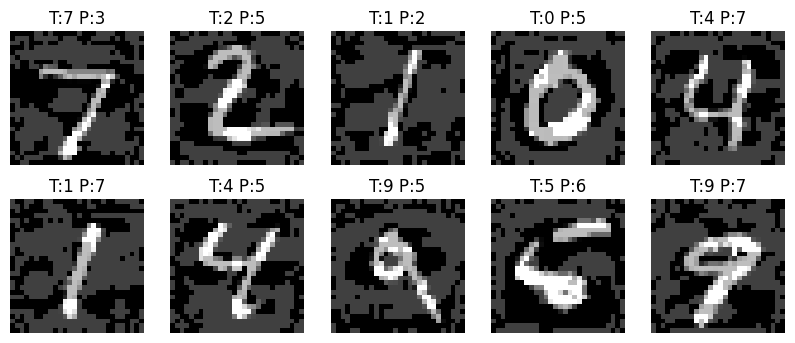

In [3]:
# =========================
# Shallow Softmax MNIST
# Optimizer : Adam
# Attaque : FGSM
# =========================

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# -------------------------
# Configuration
# -------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
epsilon = 0.25
epochs = 5
batch_size = 64

# -------------------------
# Chargement des données
# -------------------------
transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = torchvision.datasets.MNIST(
    root="./data", train=True, download=True, transform=transform
)

test_dataset = torchvision.datasets.MNIST(
    root="./data", train=False, download=True, transform=transform
)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# -------------------------
# Modèle : Shallow Softmax
# -------------------------
class ShallowSoftmax(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(28 * 28, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten
        return self.fc(x)

model = ShallowSoftmax().to(device)

# -------------------------
# Loss & Optimizer (Adam)
# -------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(
    model.parameters(),
    lr=0.001  # typique pour Adam
)

# -------------------------
# Entraînement
# -------------------------
model.train()
for epoch in range(epochs):
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs} - Loss moyenne : {total_loss / len(train_loader):.4f}")

# -------------------------
# Attaque FGSM
# -------------------------
def FGSM(model, images, labels, epsilon):
    images.requires_grad = True
    outputs = model(images)
    loss = criterion(outputs, labels)

    model.zero_grad()
    loss.backward()

    perturbation = epsilon * images.grad.sign()
    adv_images = torch.clamp(images + perturbation, 0, 1)

    return adv_images.detach()

# -------------------------
# Test sur données adversariales
# -------------------------
model.eval()
correct = 0
total = 0

for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    adv_images = FGSM(model, images, labels, epsilon)

    outputs = model(adv_images)
    _, predicted = torch.max(outputs, 1)

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"\nAccuracy sous attaque FGSM (ε = {epsilon}) : {accuracy:.2f}%")

# -------------------------
# Visualisation
# -------------------------
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)
adv_images = FGSM(model, images, labels, epsilon)

outputs = model(adv_images)
_, predictions = torch.max(outputs, 1)

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(adv_images[i][0].cpu(), cmap="gray")
    plt.title(f"T:{labels[i].item()} P:{predictions[i].item()}")
    plt.axis("off")
plt.show()


Epoch 1/5 - Loss moyenne : 0.3682
Epoch 2/5 - Loss moyenne : 0.3130
Epoch 3/5 - Loss moyenne : 0.3030
Epoch 4/5 - Loss moyenne : 0.2966
Epoch 5/5 - Loss moyenne : 0.2942

Accuracy sous attaque FGSM (ε = 0.25) : 0.03%


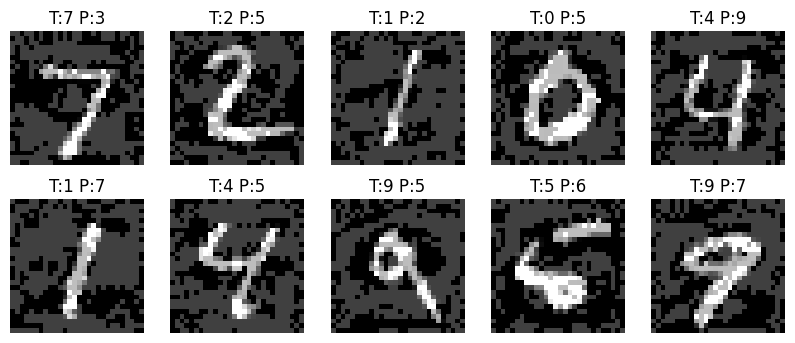

In [2]:
# =========================
# Shallow Softmax MNIST
# Optimizer : SGD
# Attaque : FGSM
# =========================

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# -------------------------
# Configuration
# -------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
epsilon = 0.25
epochs = 5
batch_size = 64

# -------------------------
# Chargement des données
# -------------------------
transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = torchvision.datasets.MNIST(
    root="./data", train=True, download=True, transform=transform
)

test_dataset = torchvision.datasets.MNIST(
    root="./data", train=False, download=True, transform=transform
)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# -------------------------
# Modèle : Shallow Softmax
# -------------------------
class ShallowSoftmax(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(28 * 28, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten
        return self.fc(x)

model = ShallowSoftmax().to(device)

# -------------------------
# Loss & Optimizer (SGD)
# -------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(
    model.parameters(),
    lr=0.1,
    momentum=0.9
)

# -------------------------
# Entraînement
# -------------------------
model.train()
for epoch in range(epochs):
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs} - Loss moyenne : {total_loss / len(train_loader):.4f}")

# -------------------------
# Attaque FGSM
# -------------------------
def FGSM(model, images, labels, epsilon):
    images.requires_grad = True
    outputs = model(images)
    loss = criterion(outputs, labels)

    model.zero_grad()
    loss.backward()

    perturbation = epsilon * images.grad.sign()
    adv_images = torch.clamp(images + perturbation, 0, 1)

    return adv_images.detach()

# -------------------------
# Test sur données adversariales
# -------------------------
model.eval()
correct = 0
total = 0

for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    adv_images = FGSM(model, images, labels, epsilon)

    outputs = model(adv_images)
    _, predicted = torch.max(outputs, 1)

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"\nAccuracy sous attaque FGSM (ε = {epsilon}) : {accuracy:.2f}%")

# -------------------------
# Visualisation
# -------------------------
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)
adv_images = FGSM(model, images, labels, epsilon)

outputs = model(adv_images)
_, predictions = torch.max(outputs, 1)

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(adv_images[i][0].cpu(), cmap="gray")
    plt.title(f"T:{labels[i].item()} P:{predictions[i].item()}")
    plt.axis("off")
plt.show()
